# Analysing the impact of covid-19 on financial market 

In [4]:
#import the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf
from datetime import datetime
plt.style.use('fivethirtyeight')
from pandas_datareader.data import DataReader
import io, os, sys, types

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

#!pip install plotly 
import plotly.graph_objs as go # this is used for interactivate plot
import plotly.express as px
import requests

In [5]:
#Load the Covid-19 data
df = pd.read_csv('us.csv')
df_covid= df.drop(['deaths'], axis =1)
df_covid

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3
...,...,...
444,2021-04-09,31107211
445,2021-04-10,31171549
446,2021-04-11,31219820
447,2021-04-12,31292117


In [6]:
df_covid.isnull().sum()

date     0
cases    0
dtype: int64

In [7]:
df_covid.describe()

,cases
count,4.490000e+02
mean,1.013432e+07
std,1.056623e+07
min,1.000000e+00
25%,1.376749e+06
50%,6.089504e+06
75%,1.828542e+07
max,3.136943e+07


Text(0.5, 1.0, 'Covid-19 confirmed cases in USA')

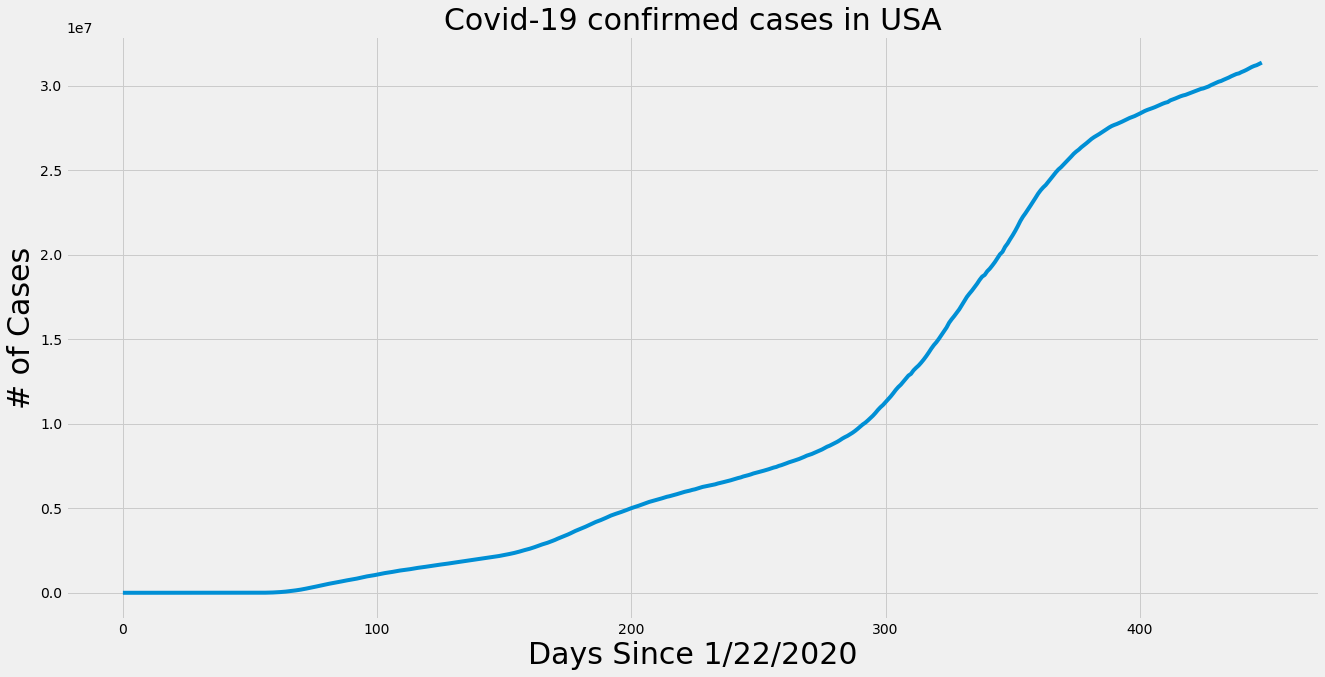

In [8]:
plt.figure(figsize=(20, 10))
df_covid['cases'].plot()
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
#plt.xlabel(None)
plt.title("Covid-19 confirmed cases in USA",size=30)

In [9]:
# get the date of max number of confiremd covid19 cases 
df_covid[df_covid['cases']==df_covid.max()['cases']]

,date,cases
448,2021-04-13,31369429


### Data Extraction

Getting The Data From Yahoo Finance 

--Booking Stock (Ticker: BKNG on the NASDAQ)- Booking

--Netflix Stock (Ticker: NFLX on the NASDAQ) Media/Entertainment

--United Airlines Stock (Ticker: UAL on the NASDAQ)- Airlines

--Royal Caribbean Cruises (Ticker: RCL on the NASDAQ) - Cruise & Casino

--Playa Hotels & Resorts (Ticker: PLEA on the NASDAQ) - Hotels and Resorts

In [10]:
stock_list = [ 'BKNG','NFLX','UAL', 'RCL', 'PLYA']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [11]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in stock_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [12]:
def getCompanyData(comp_name,start,end, FullName):
    import yfinance as yf
    st = yf.download(comp_name, start, end)
    st['CompanyName'] = FullName
    return st


    
def test_stationarity(timeseries):
    import pandas as pnd
    import matplotlib.pyplot as pl
    from statsmodels.tsa.stattools import adfuller
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    pl.plot(timeseries, color='blue',label='Original')
    pl.plot(rolmean, color='red', label='Rolling Mean')
    pl.plot(rolstd, color='black', label = 'Rolling Std')
    pl.legend(loc='best')
    pl.title('Rolling Mean and Standard Deviation')
    pl.show(block=False)
    print("Results of the  test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pnd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

In [13]:
company_list = [BKNG, NFLX,UAL,RCL,PLYA]
company_name = ["BOOKING", "NETFLIX", "UNITED AIRLINES","Royal Caribbean Cruises", "PLAYA HOTELS&RESORTS"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [56]:
data = pd.concat(company_list, axis=0)


In [15]:
data

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-04-22,1853.199951,1831.040039,1833.930054,1844.170044,315900.0,1844.170044,BOOKING
2019-04-23,1895.280029,1847.339966,1849.229980,1887.729980,549300.0,1887.729980,BOOKING
2019-04-24,1893.979980,1863.599976,1887.140015,1867.280029,506600.0,1867.280029,BOOKING
2019-04-25,1884.810059,1856.930054,1870.650024,1866.260010,384400.0,1866.260010,BOOKING
2019-04-26,1883.500000,1850.010010,1868.099976,1868.000000,541100.0,1868.000000,BOOKING
...,...,...,...,...,...,...,...
2021-04-16,7.400000,7.190000,7.290000,7.280000,841000.0,7.280000,PLAYA HOTELS&RESORTS
2021-04-19,7.370000,7.190000,7.290000,7.350000,1661400.0,7.350000,PLAYA HOTELS&RESORTS
2021-04-20,7.314000,7.010000,7.250000,7.120000,2045700.0,7.120000,PLAYA HOTELS&RESORTS


In [51]:
len(data)

2530

### Pre-Processing and Data Cleaning

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2530 entries, 2019-04-22 to 2021-04-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2530 non-null   float64
 1   Low           2530 non-null   float64
 2   Open          2530 non-null   float64
 3   Close         2530 non-null   float64
 4   Volume        2530 non-null   float64
 5   Adj Close     2530 non-null   float64
 6   company_name  2530 non-null   object 
dtypes: float64(6), object(1)
memory usage: 158.1+ KB


In [17]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2530.000000,2530.000000,2530.000000,2530.000000,2.530000e+03,2530.000000
mean,495.745374,481.693099,488.887048,488.721338,7.030217e+06,488.535100
std,729.071729,710.438492,719.994484,719.716332,1.299163e+07,719.812906
min,1.630000,1.300000,1.560000,1.450000,5.140000e+04,1.450000
25%,36.552500,33.774999,35.127501,34.704999,5.077750e+05,34.704999
50%,92.934998,90.809998,91.879997,91.629997,2.279950e+06,91.629997
75%,508.757492,492.895004,500.752502,500.767487,6.777400e+06,500.767487
max,2489.409912,2443.110107,2480.429932,2476.899902,1.428128e+08,2476.899902


In [18]:
data.isnull().sum()

High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64

### Exploratory data analysis

#### historical view of the closing price

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider 
the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

Text(0.5, 1.0, 'Beach Stocks ')

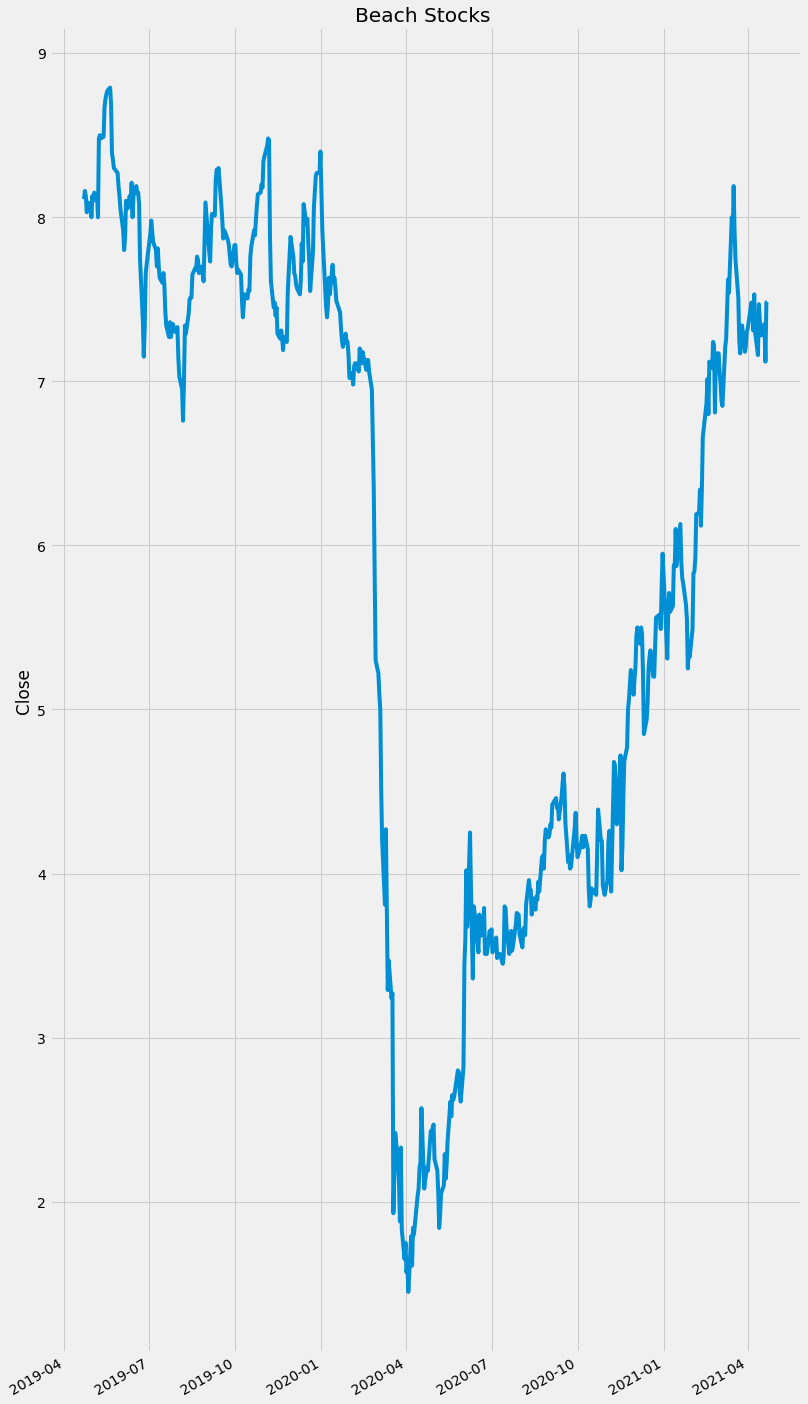

In [22]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=2.5, bottom=1.2)
company['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Beach Stocks ")

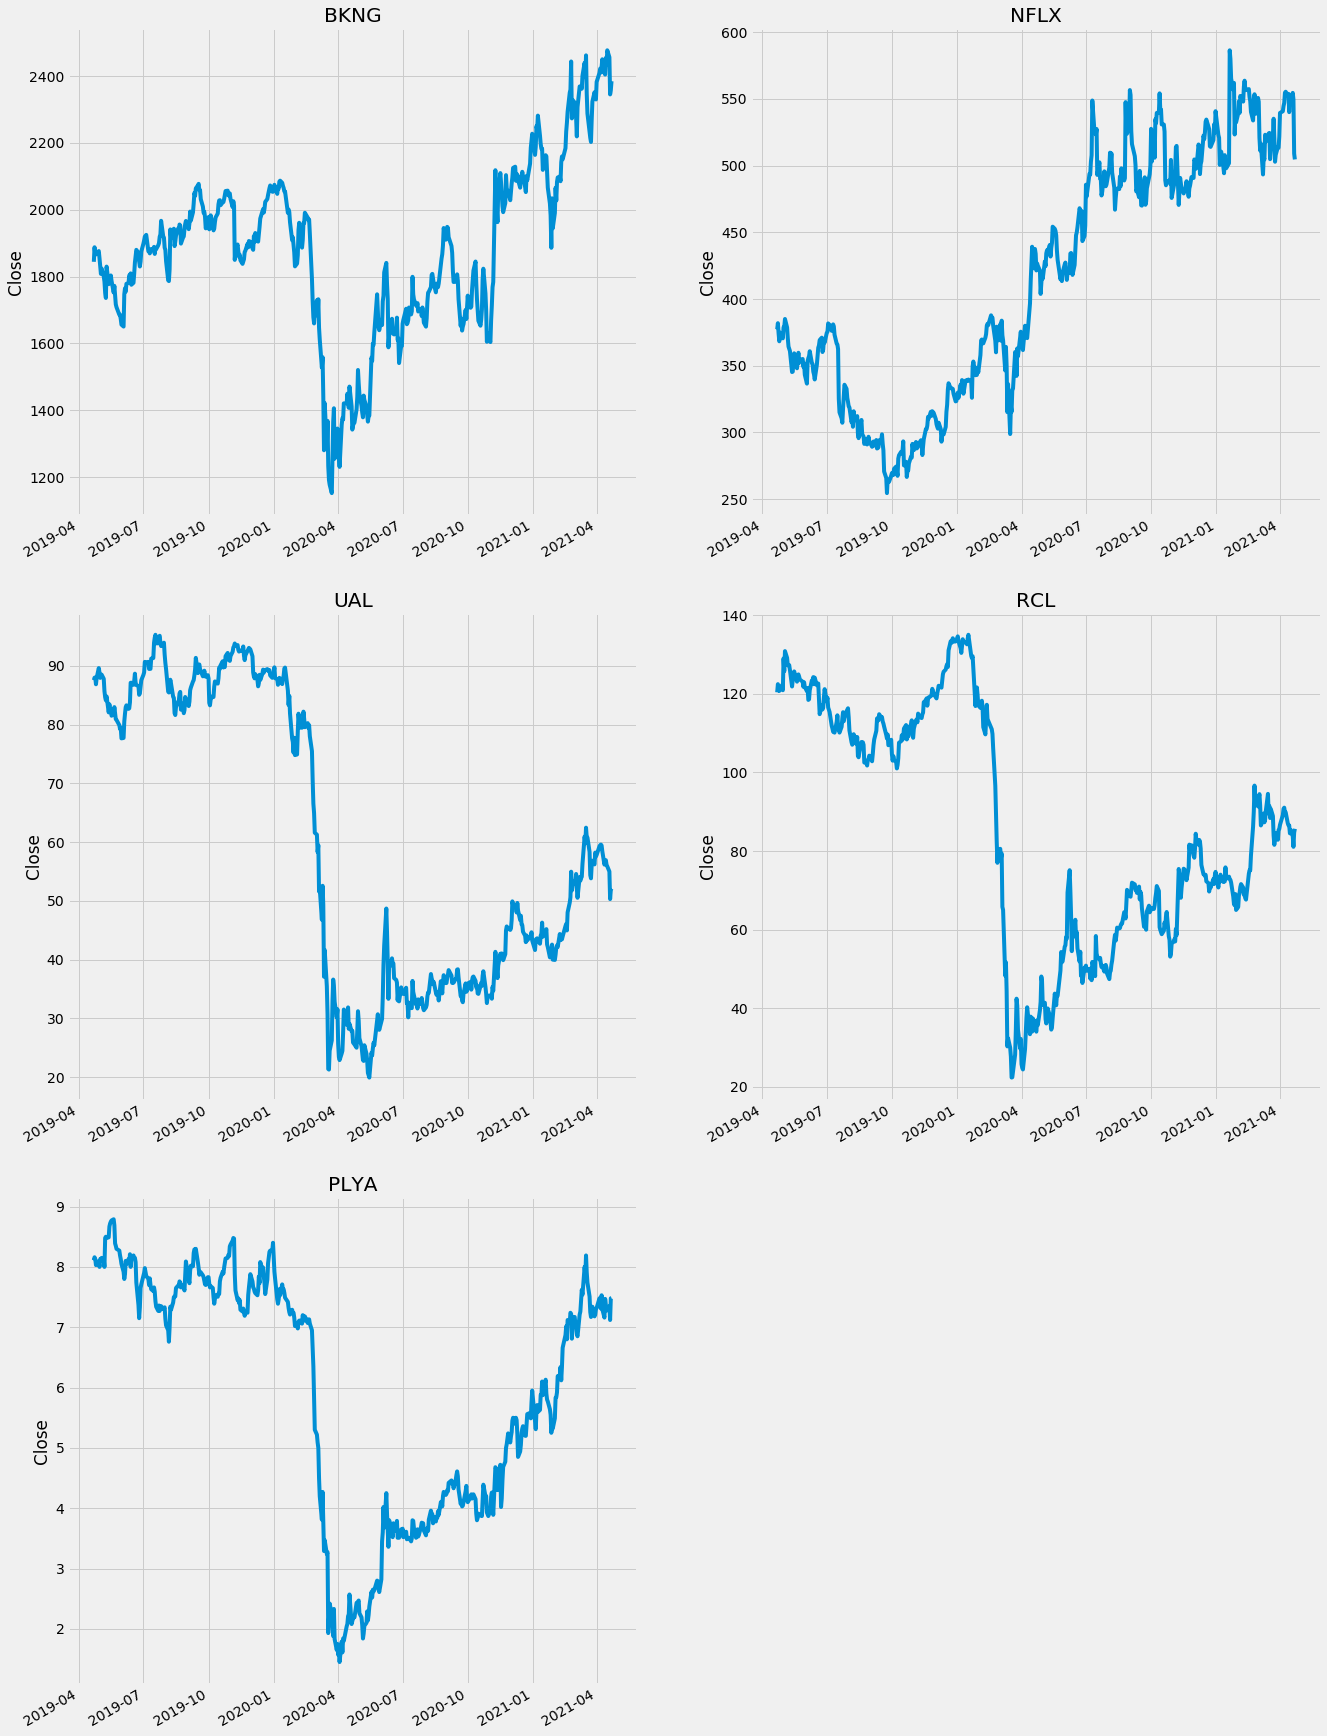

In [23]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=2.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    #fig, axs = plt.subplots(1, figsize=(8, 4), sharey=True)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{stock_list[i - 1]}")

#### historical view of the Volume 

Text(0.5, 1.0, 'Beach Stocks ')

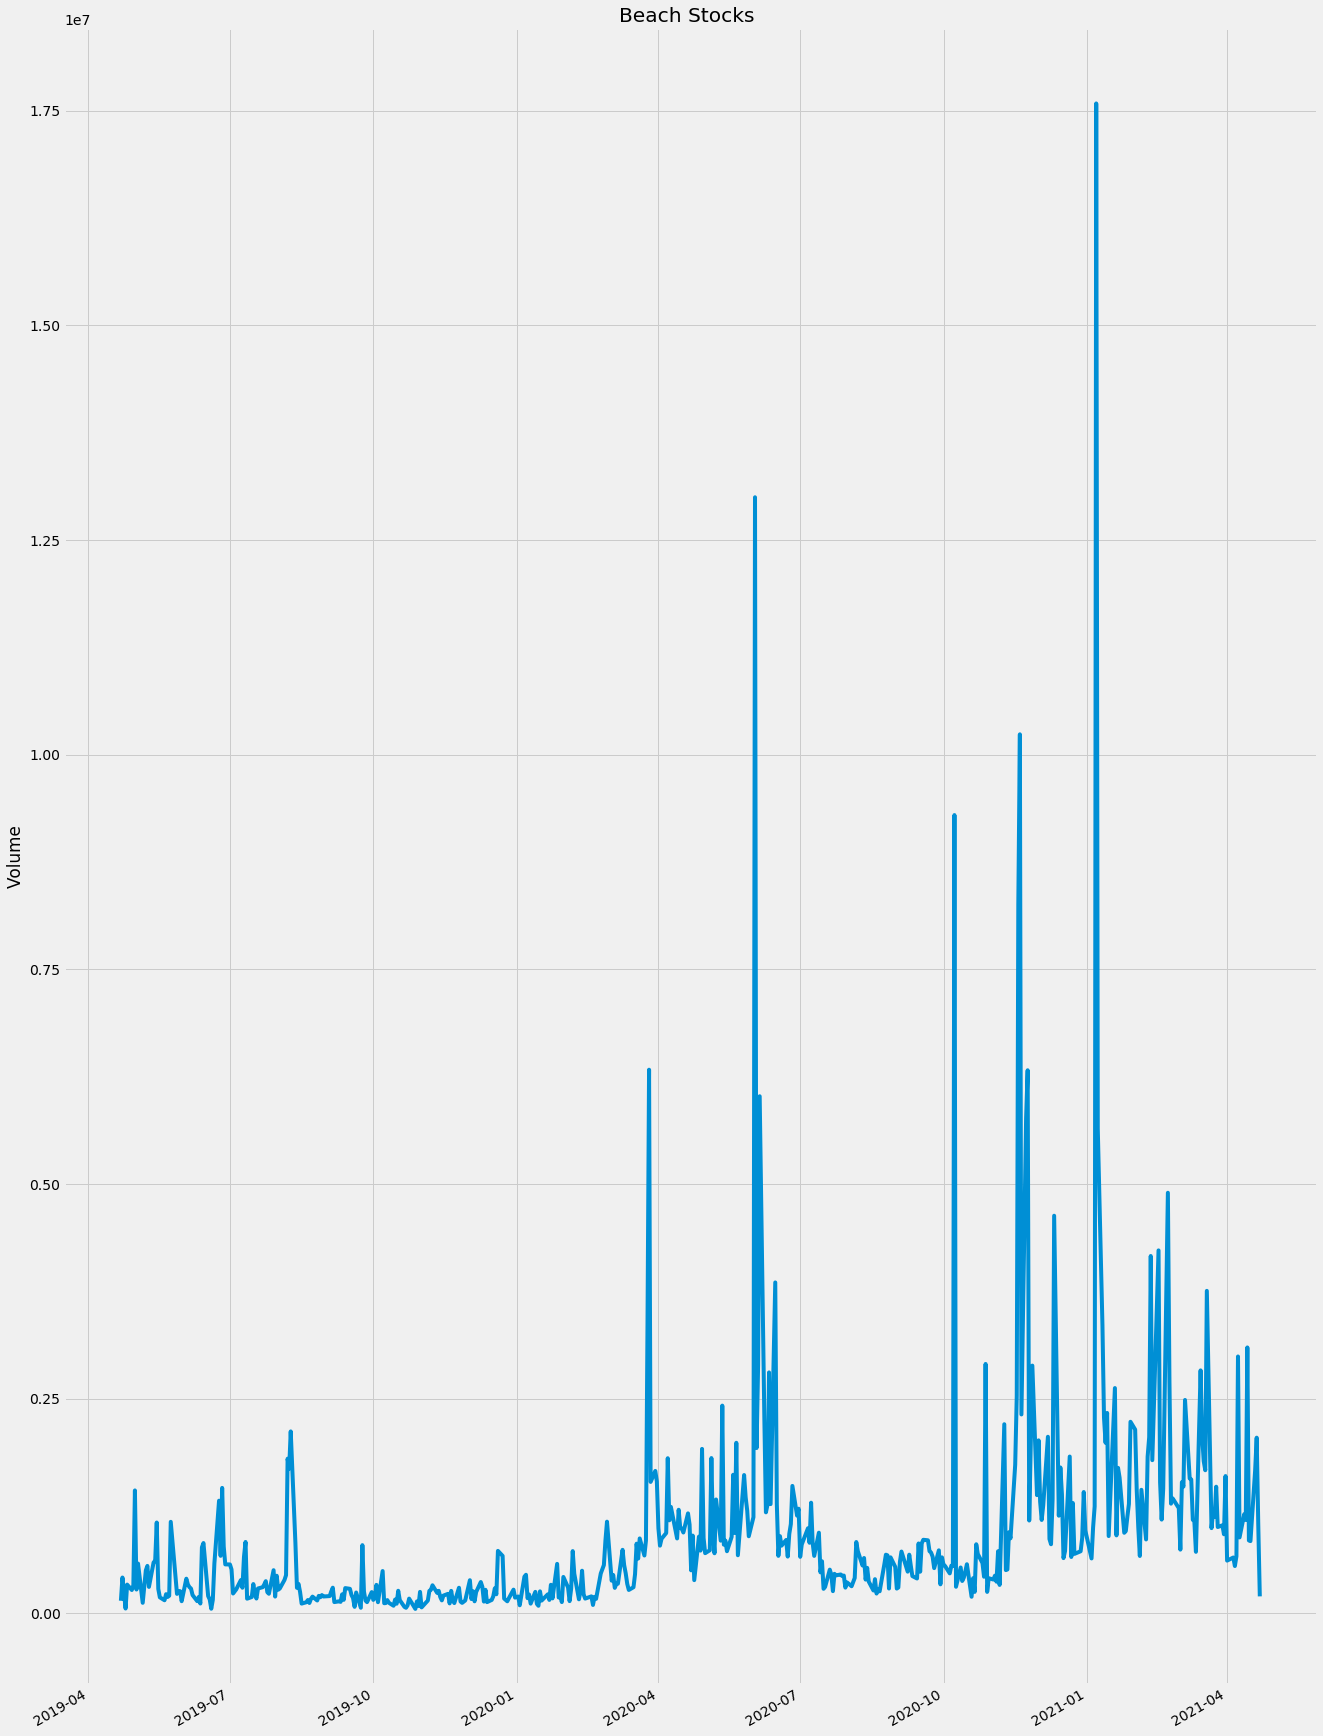

In [24]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=2.5, bottom=1.2)
company['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Beach Stocks ")

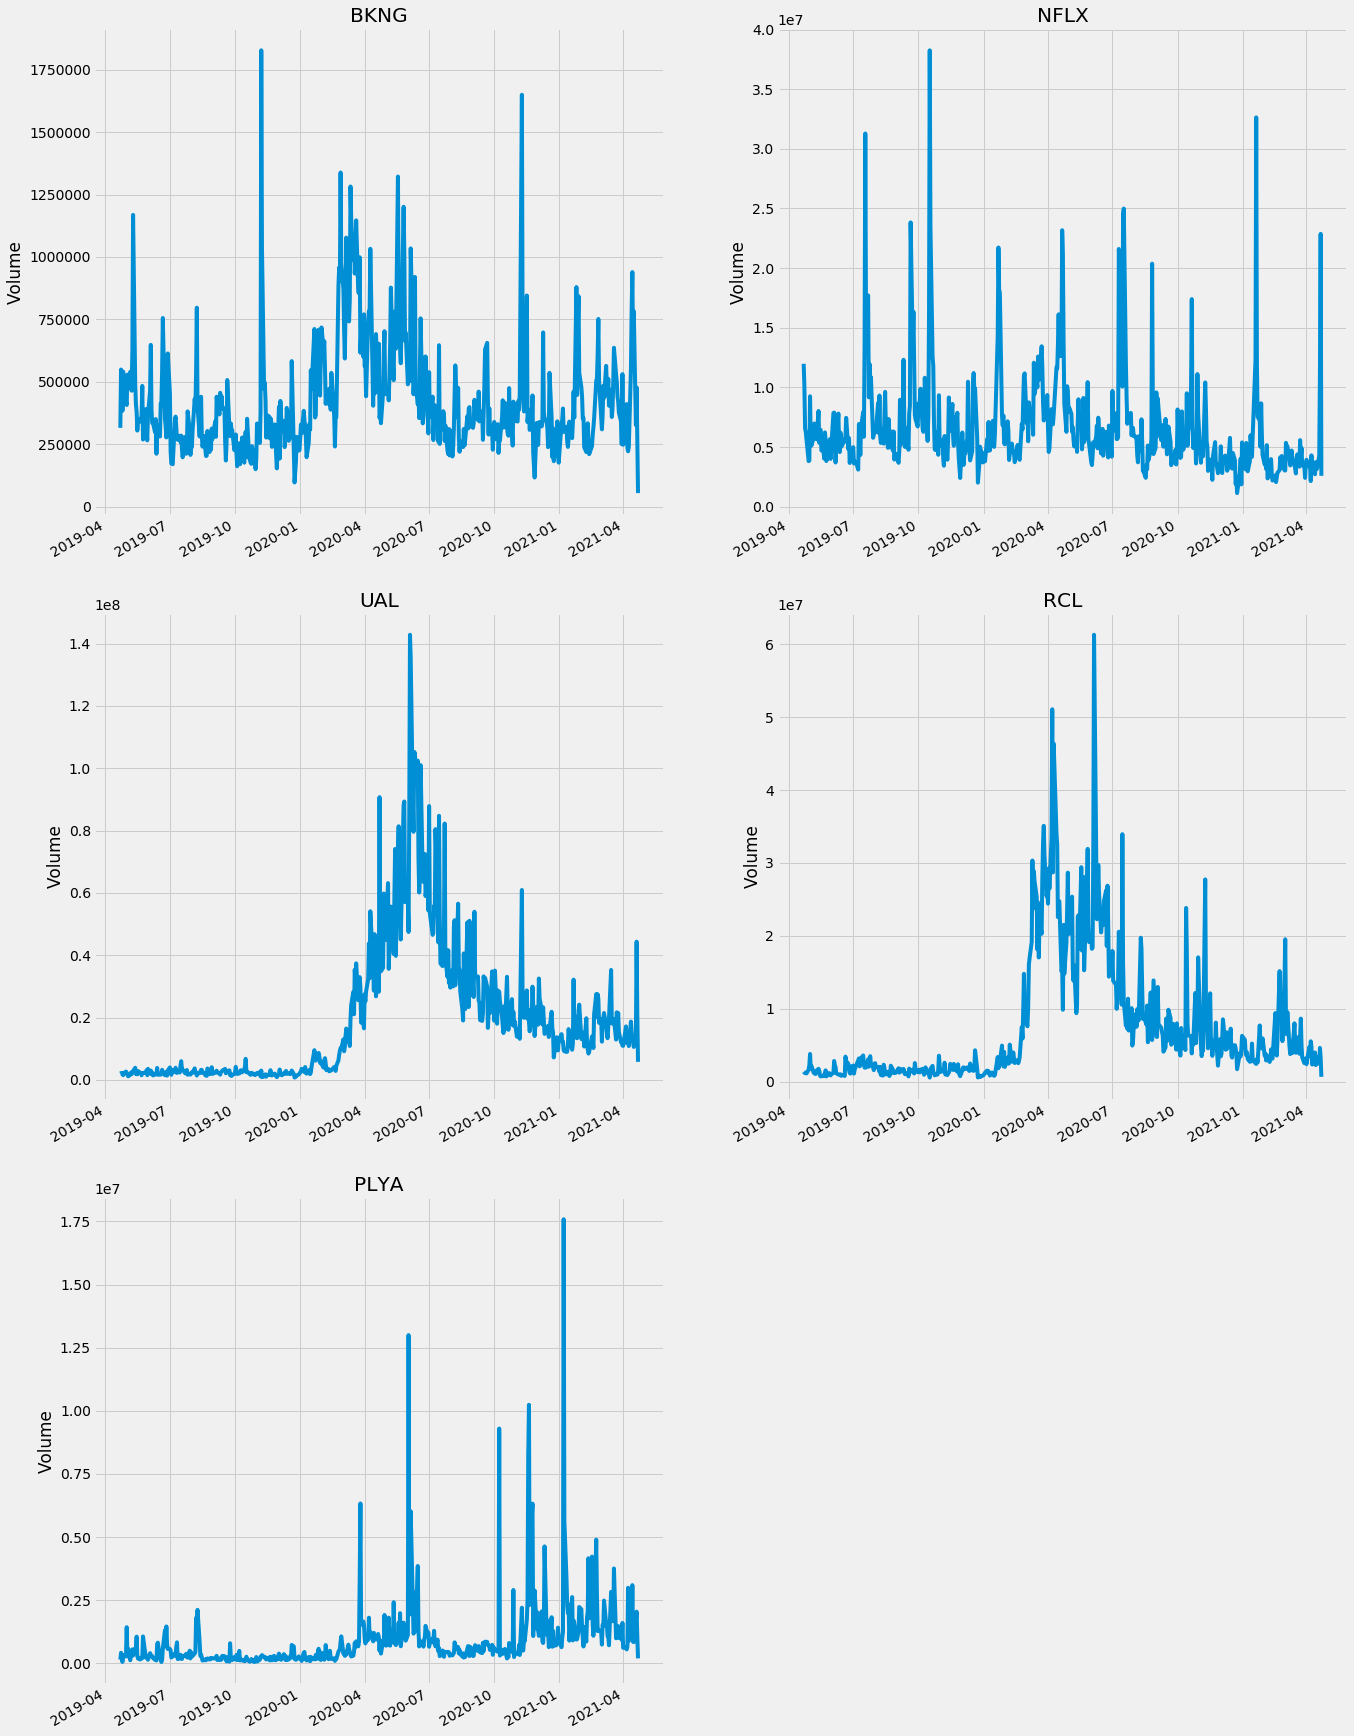

In [25]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=2.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    #fig, axs = plt.subplots(1, figsize=(8, 4), sharey=True)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{stock_list[i - 1]}")

#### Finding out the dates of maximum and minimum trading for the beach stocks

In [26]:
print("BEACH stocks Max:", (data['Volume'].idxmax()))
print("BEACH Stocks Min:", (data['Volume'].idxmin()))

BEACH stocks Max: 2020-06-04 00:00:00
BEACH Stocks Min: 2019-10-28 00:00:00


### Feature Engineering

#### Creating column 'Total Traded' = Open Price * Volume

Stock trading volume refers to the amount of shares traded in a particular stock over a period of time. Often volume is
measured in terms of shares traded per day. Remember that the number of shares bought and sold.
If there's a higher volume of trading in a particular stock, that naturally means that investors are interested in buying 
or selling it. If volume and price are on the rise, it means investors are betting the company will do well. If volume is
up but price is down, it means more investors are looking to sell.

Text(0, 0.5, 'Total Traded')

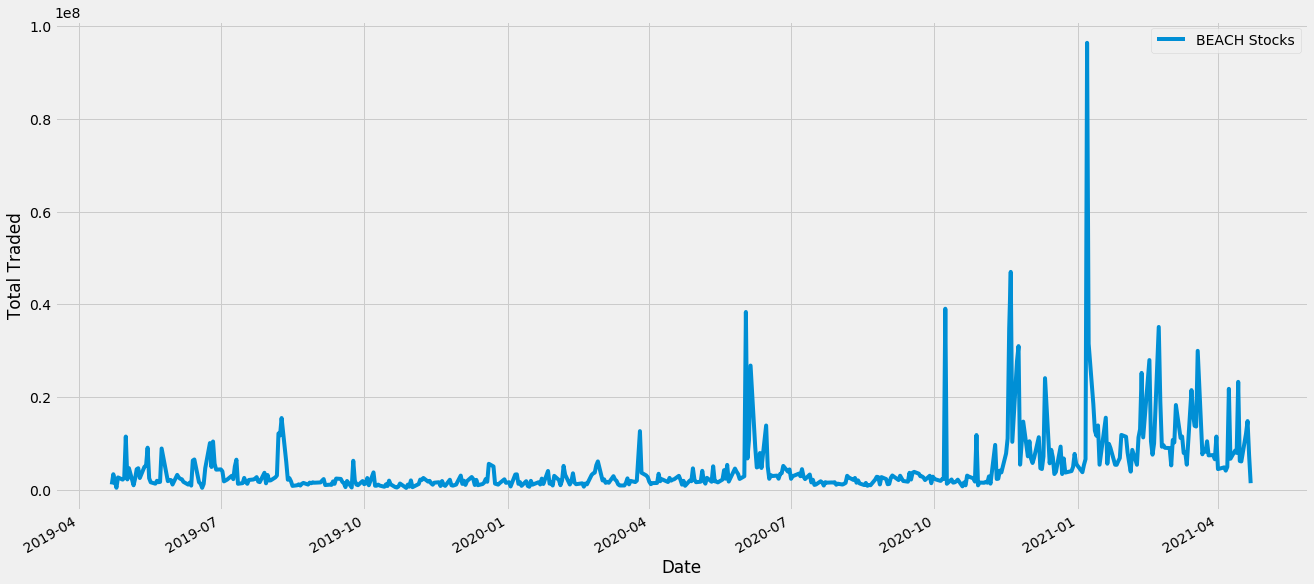

In [27]:
plt.figure(figsize=(20, 10))
company['Total Traded']= company['Open'] * company['Volume']
company['Total Traded'].plot(label = 'BEACH Stocks')
plt.legend()
plt.ylabel('Total Traded')

In [28]:
BKNG['Total Traded'] = BKNG['Open'] * BKNG['Volume']
NFLX['Total Traded'] = NFLX['Open'] * NFLX['Volume']
UAL['Total Traded'] = UAL['Open'] * UAL['Volume']
RCL['Total Traded'] = RCL['Open'] * RCL['Volume']
PLYA['Total Traded'] = PLYA['Open'] * PLYA['Volume']

Text(0, 0.5, 'Total Traded')

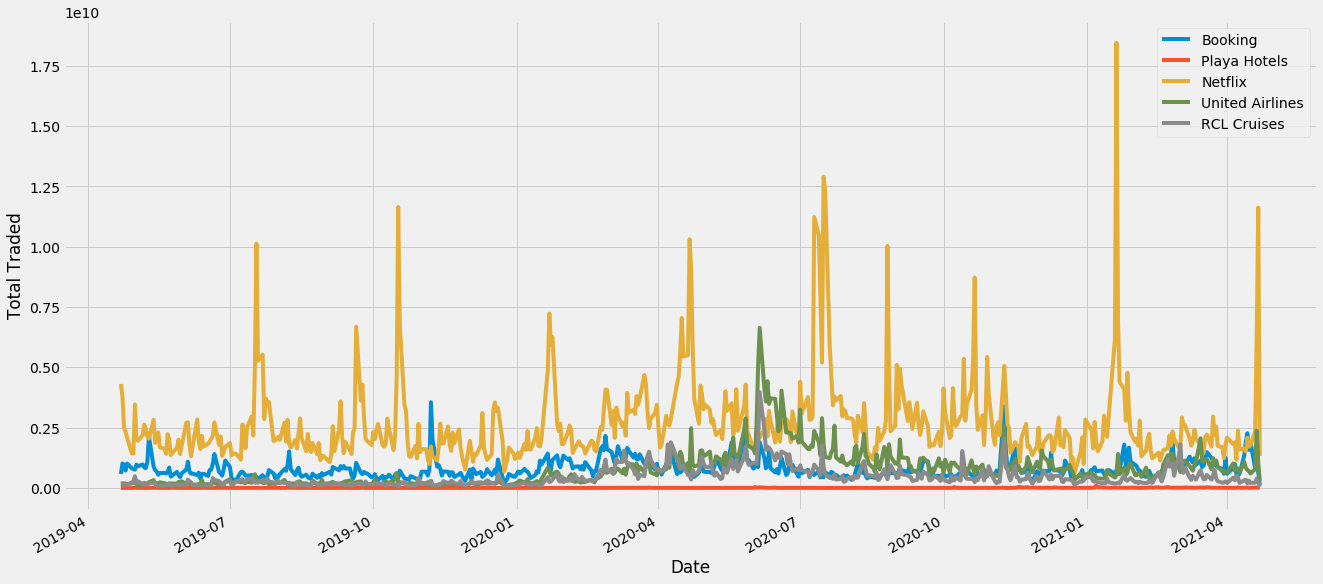

In [29]:
plt.figure(figsize=(20, 10))
BKNG['Total Traded'].plot(label = 'Booking')
PLYA['Total Traded'].plot(label = 'Playa Hotels ')
NFLX['Total Traded'].plot(label = 'Netflix')
UAL['Total Traded'].plot(label = 'United Airlines')
RCL['Total Traded'].plot(label = 'RCL Cruises')
plt.legend()
plt.ylabel('Total Traded')

## Decomposing Time Series

In [30]:
# import necessary libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import rcParams

C:\Users\nares\anaconda3\envs\DAB300F20\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


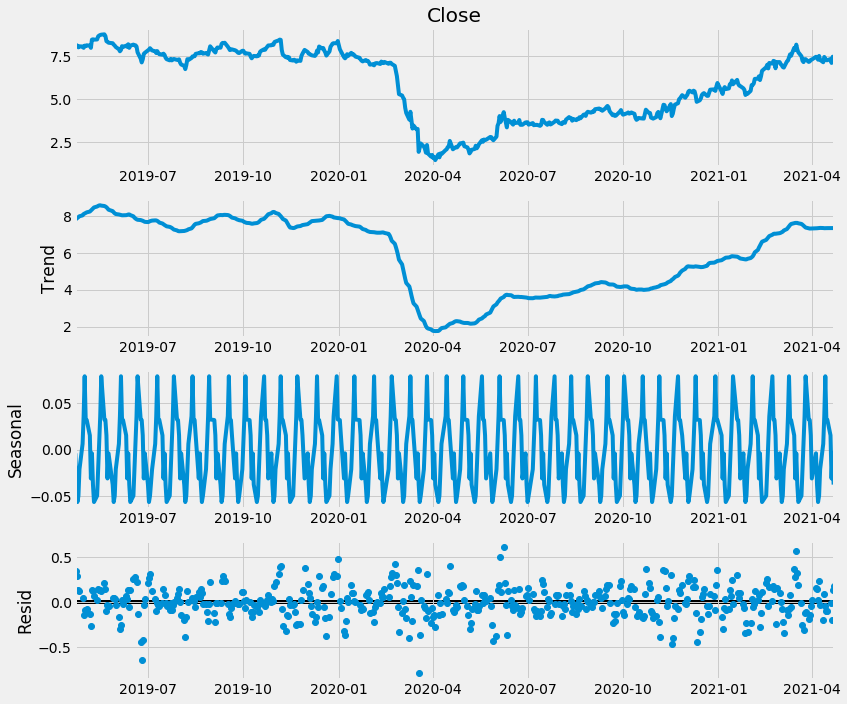

In [31]:
# additive seasonal decomposition
rcParams['figure.figsize']= 12,10
decomp_add = sm.tsa.seasonal_decompose(company['Close'], model='additive', extrapolate_trend='freq', freq = 12)
fig = decomp_add.plot()
plt.show()

C:\Users\nares\anaconda3\envs\DAB300F20\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


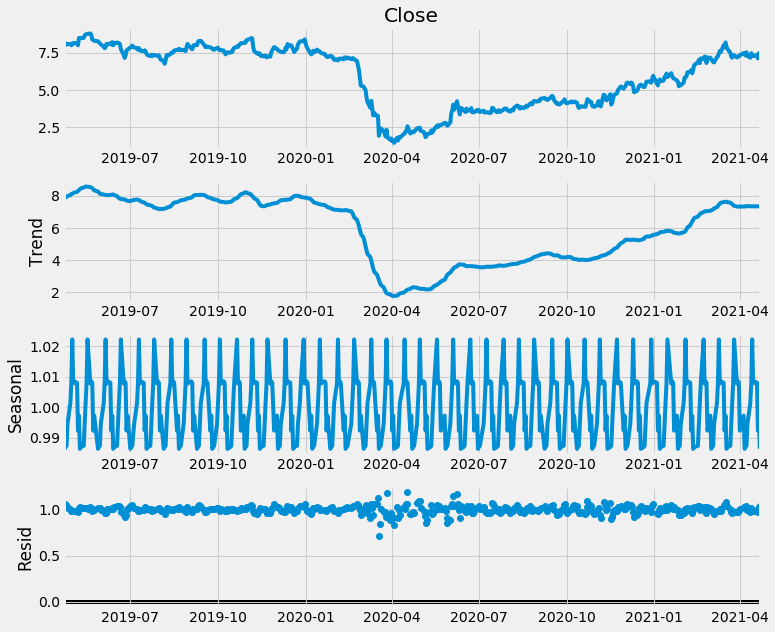

In [32]:
# multiplicative seasonal decomposition
rcParams['figure.figsize']= 11,9
decomp_mul = sm.tsa.seasonal_decompose(company['Close'], model='multiplicative', extrapolate_trend='freq', freq = 12)
fig = decomp_mul.plot()
plt.show()

# Moving Average

In [50]:
company.head()

,High,Low,Open,Close,Volume,Adj Close,company_name,Total Traded
Date,,,,,,,,
2019-04-22,8.25,8.01,8.01,8.11,146300,8.11,PLAYA HOTELS&RESORTS,1.171863e+06
2019-04-23,8.23,8.08,8.08,8.16,416900,8.16,PLAYA HOTELS&RESORTS,3.368552e+06
2019-04-24,8.25,7.99,8.19,8.13,234900,8.13,PLAYA HOTELS&RESORTS,1.923831e+06
2019-04-25,8.30,8.03,8.14,8.03,55800,8.03,PLAYA HOTELS&RESORTS,4.542120e+05
2019-04-26,8.16,7.96,8.03,8.09,334500,8.09,PLAYA HOTELS&RESORTS,2.686035e+06


In [33]:
df = company.copy()
df_ma = df.drop(['High','Low','Open','Volume','Total Traded','Adj Close'], axis =1)
df1=df_ma.copy()

In [49]:
df1.head()

,Close
Date,
2019-04-22,8.11
2019-04-23,8.16
2019-04-24,8.13
2019-04-25,8.03
2019-04-26,8.09


In [34]:
# calculate moving averages with certain windows n = 4 to 12
for i in range(4,12,2):
    colName = 'SMA_{0}'
    df_ma[colName.format(i)] = df.Close.rolling(i, min_periods=1).mean()


In [35]:
df_ma.head(5)

,Close,company_name,SMA_4,SMA_6,SMA_8,SMA_10
Date,,,,,,
2019-04-22,8.11,PLAYA HOTELS&RESORTS,8.110000,8.110000,8.110000,8.110000
2019-04-23,8.16,PLAYA HOTELS&RESORTS,8.135000,8.135000,8.135000,8.135000
2019-04-24,8.13,PLAYA HOTELS&RESORTS,8.133333,8.133333,8.133333,8.133333
2019-04-25,8.03,PLAYA HOTELS&RESORTS,8.107500,8.107500,8.107500,8.107500
2019-04-26,8.09,PLAYA HOTELS&RESORTS,8.102500,8.104000,8.104000,8.104000


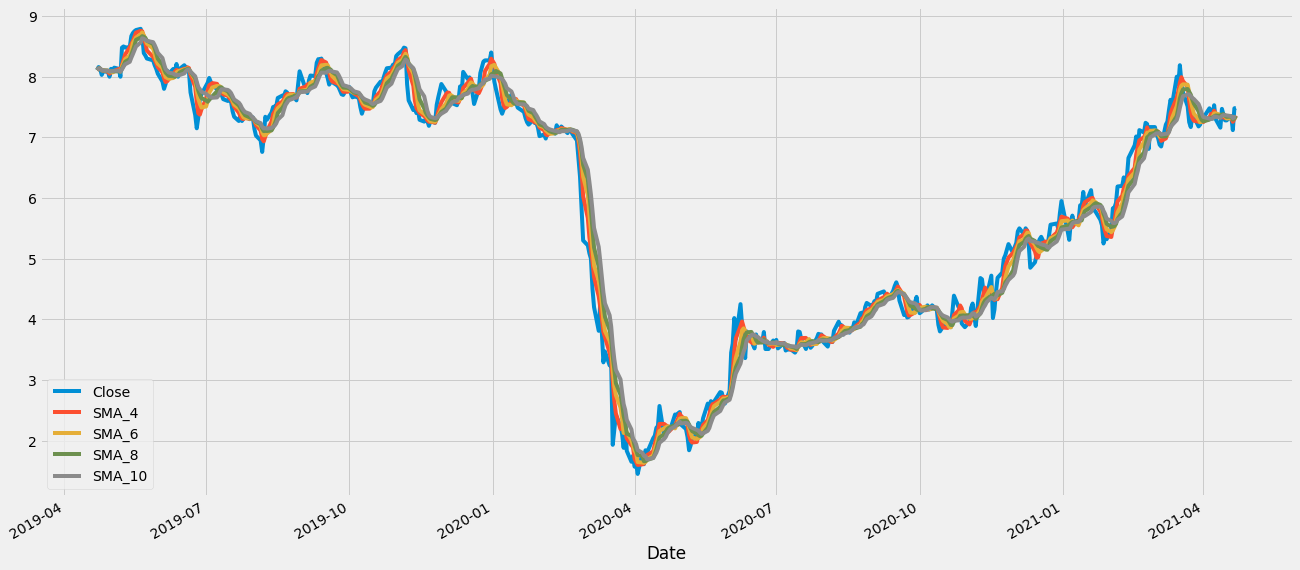

In [36]:
df_ma.plot(figsize=(20,10))

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics


In [38]:
#calculating mean absolute percentage (MAPE)
#MAPE can be used as an indicator of accuracy
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [39]:
#calculate error factor
#df_ma['Err_4']=df_ma['Close']-df_ma['SMA_4']
df_ma['Err_6']=df_ma['Close']-df_ma['SMA_6']
df_ma['Err_4']=df_ma['Close']-df_ma['SMA_8']
df_ma['Err_10']=df_ma['Close']-df_ma['SMA_10']
df_ma

,Close,company_name,SMA_4,SMA_6,SMA_8,SMA_10,Err_6,Err_4,Err_10
Date,,,,,,,,,
2019-04-22,8.110,PLAYA HOTELS&RESORTS,8.110000,8.110000,8.110000,8.110000,0.000000,0.000000,0.000000
2019-04-23,8.160,PLAYA HOTELS&RESORTS,8.135000,8.135000,8.135000,8.135000,0.025000,0.025000,0.025000
2019-04-24,8.130,PLAYA HOTELS&RESORTS,8.133333,8.133333,8.133333,8.133333,-0.003333,-0.003333,-0.003333
2019-04-25,8.030,PLAYA HOTELS&RESORTS,8.107500,8.107500,8.107500,8.107500,-0.077500,-0.077500,-0.077500
2019-04-26,8.090,PLAYA HOTELS&RESORTS,8.102500,8.104000,8.104000,8.104000,-0.014000,-0.014000,-0.014000
...,...,...,...,...,...,...,...,...,...
2021-04-16,7.280,PLAYA HOTELS&RESORTS,7.351250,7.310833,7.338125,7.362500,-0.030833,-0.058125,-0.082500
2021-04-19,7.350,PLAYA HOTELS&RESORTS,7.321250,7.319167,7.343125,7.349500,0.030833,0.006875,0.000500
2021-04-20,7.120,PLAYA HOTELS&RESORTS,7.257500,7.312500,7.291875,7.317500,-0.192500,-0.171875,-0.197500


In [40]:
#calculate MAE, RMSE and MSE for MA 4
MAE = df_ma["Err_4"].abs().mean()  
print("MAE:",round(MAE,2)) 

RMSE = np.sqrt((df_ma["Err_4"]**2).mean())
print("RMSE:",round(RMSE,2))

MSE= (df_ma["Err_4"]**2).mean()
print("MSE:",round(MSE,2))

print("MAPE:",mean_absolute_percentage_error(df_ma['Close'],df_ma['SMA_4']))

MAE: 0.21
RMSE: 0.29
MSE: 0.08
MAPE: 2.6825470278771557


## Exponential Smoothing

### Simple Exponential Smoothing

In [41]:
df1 = df1.drop(['company_name'], axis =1)

In [42]:
df1.shape

(506, 1)

In [43]:
df1.head()

,Close
Date,
2019-04-22,8.11
2019-04-23,8.16
2019-04-24,8.13
2019-04-25,8.03
2019-04-26,8.09


In [44]:
df_diff = df1.diff(1).dropna() #shifting data based on seasonality breakdown

In [45]:
df_diff

,Close
Date,
2019-04-23,0.050
2019-04-24,-0.030
2019-04-25,-0.100
2019-04-26,0.060
2019-04-29,-0.010
...,...
2021-04-16,0.000
2021-04-19,0.070
2021-04-20,-0.230


In [46]:
#using dicky-fuller test to determine if data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Close'])
print(result)

(-1.4658190138670555, 0.5503473727491283, 9, 496, {'1%': -3.4436029548776395, '5%': -2.867384756137026, '10%': -2.5698830308597813}, -254.91381700671855)


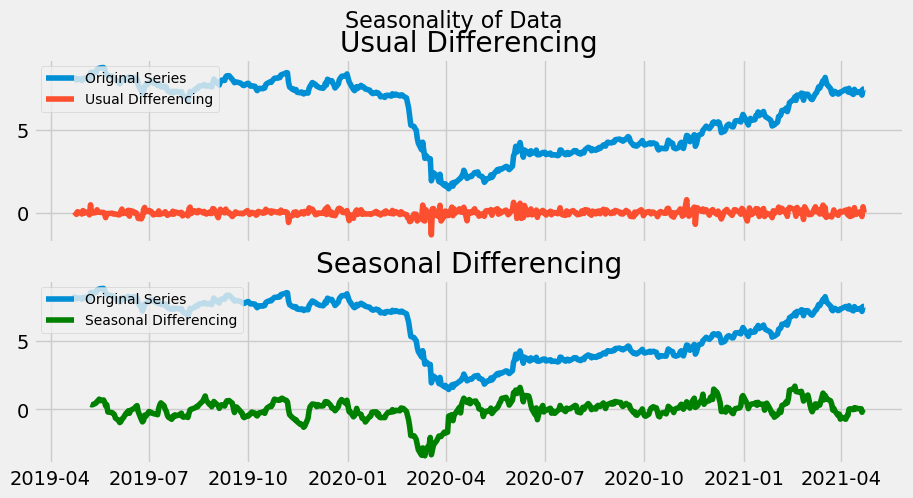

In [47]:
# Plot for comparing seasonal and usual differencing
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df1[:], label='Original Series')
axes[0].plot(df1[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Differencing
axes[1].plot(df1[:], label='Original Series')
axes[1].plot(df1[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
axes[1].legend(loc='upper left', fontsize=10)

plt.suptitle('Seasonality of Data', fontsize=16)
plt.show()

In [48]:
#splitting the data into test and train splits in the ratio of 70:30
train=df_diff[0:-30] 
test=df_diff[-30:]
print(train.shape)
print(test.shape)

(475, 1)
(30, 1)


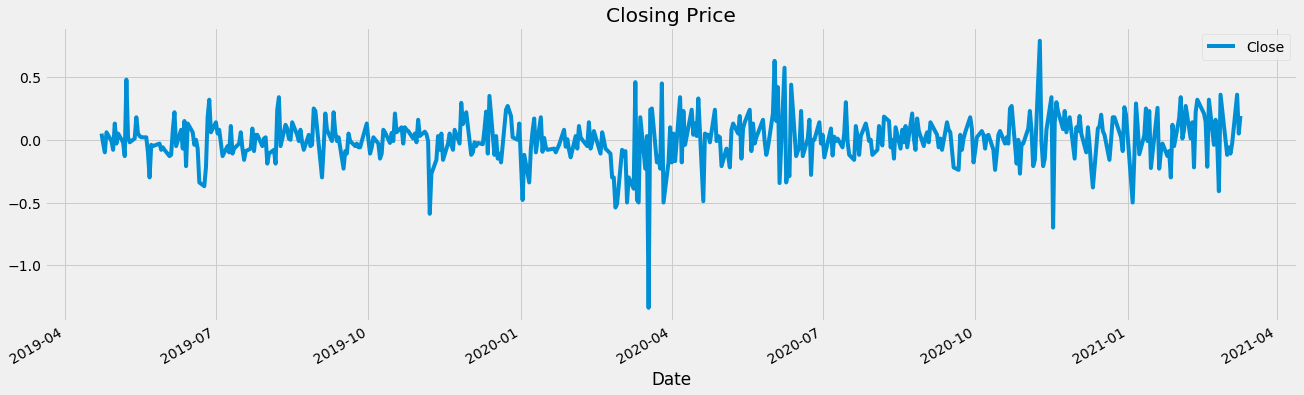

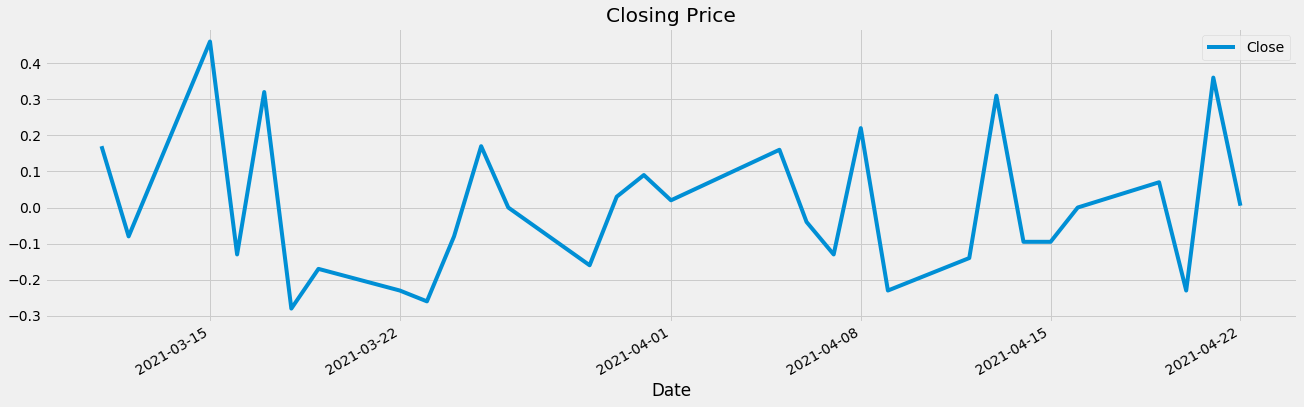

In [57]:
# plot test and train sets
train.plot(figsize=(20,6), title= 'Closing Price', fontsize=14)
test.plot(figsize=(20,6), title= 'Closing Price', fontsize=14)
plt.show()

In [58]:
# import required libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [59]:
# Fit the model - triple exponential smoothing using additive seasonality.
pred = test.copy()
# Modelling using train data
fit_tes = ExponentialSmoothing(np.asarray(train),seasonal_periods=12 ,trend='add', seasonal='add').fit()
# Forecasting using test data
pred['Holt_Winter'] = fit_tes.forecast(len(test))
# Calculate KPI's

C:\Users\nares\anaconda3\envs\DAB300F20\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


MAE 0.17
MSE 0.04
RMSE 0.20
MAPE: inf


C:\Users\nares\anaconda3\envs\DAB300F20\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


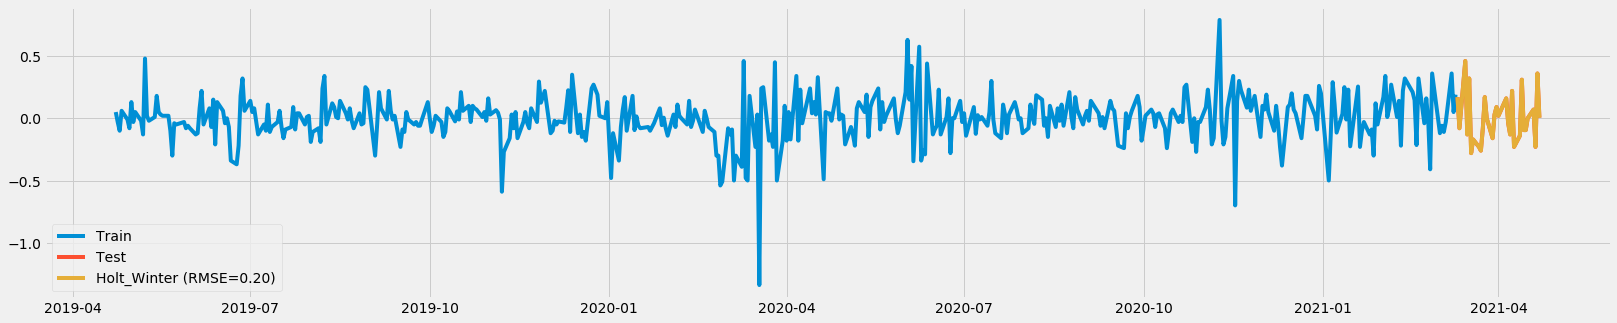

In [60]:
# calculate evaluation metrics for measuring performance
mae = mean_absolute_error(test.Close, pred.Holt_Winter)

mse=mean_squared_error(test.Close, pred.Holt_Winter)

rmse = sqrt(mean_squared_error(test.Close, pred.Holt_Winter))

print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
print("MAPE:",mean_absolute_percentage_error(test.Close,pred.Holt_Winter))

# Plotting actual(test, train) and predicted data

plt.figure(figsize=(25,5))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(pred['Close'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

## ARIMA

In [61]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

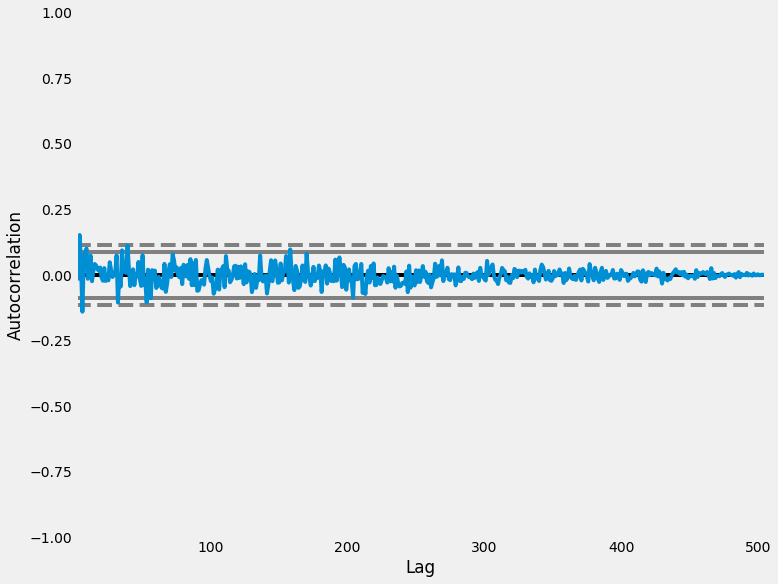

In [62]:
# plotting the autocorrelation function using the modified data
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_diff.Close)
plt.show()

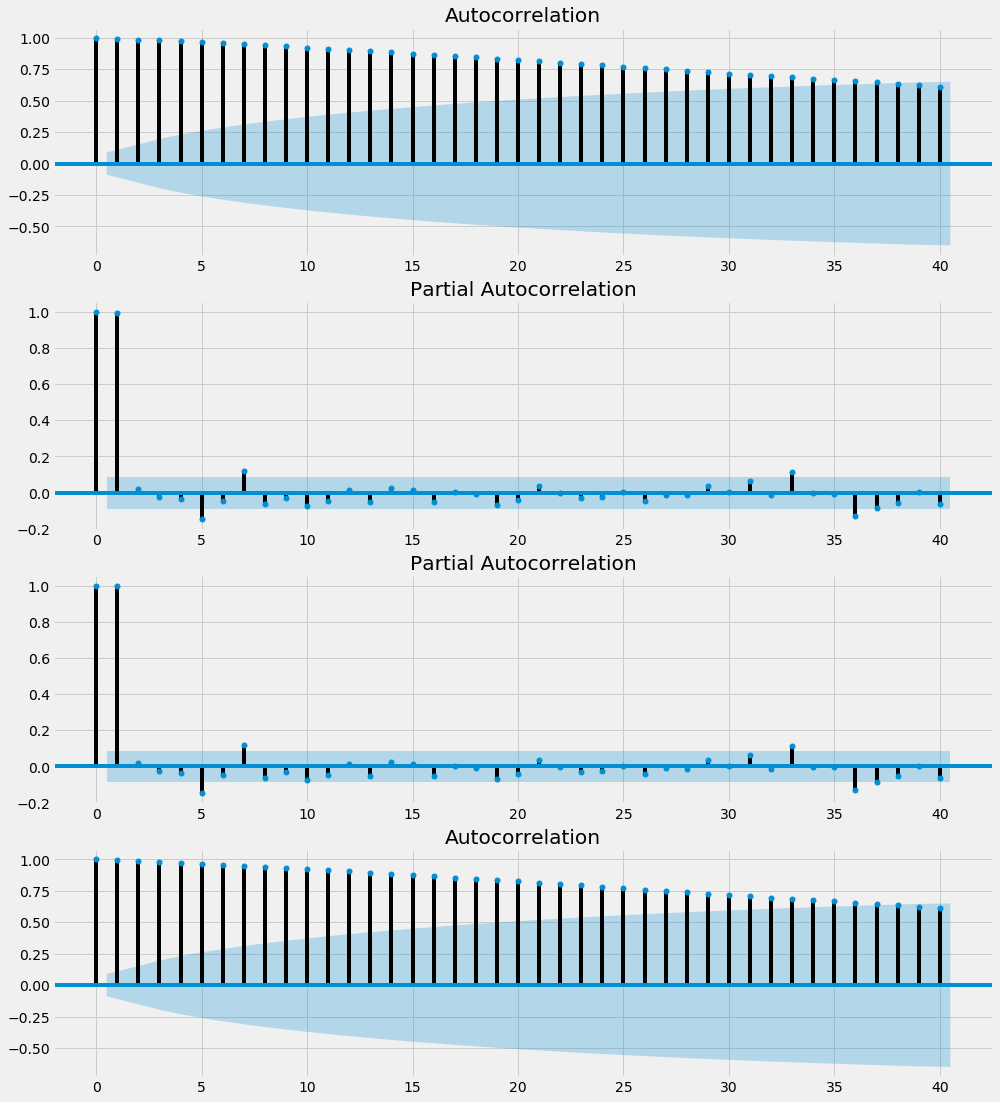

In [63]:
# plotting ACF and PACF plots till 40 lags
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(15,18))
ax1 = fig.add_subplot(411)
fig = sm.graphics.tsa.plot_acf(df1['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(412)
fig = sm.graphics.tsa.plot_pacf(df1['Close'].iloc[13:],lags=40,ax=ax2)
ax3 = fig.add_subplot(413)
fig = sm.graphics.tsa.plot_pacf(df1['Close'].iloc[13:],lags=40,ax=ax3)
ax4 = fig.add_subplot(414)
fig = sm.graphics.tsa.plot_acf(df1['Close'].iloc[13:],lags=40,ax=ax4)

In [70]:
# Using auto arima for identifying the ideal hyperparameters - p, q and d
import pmdarima as pm

smodel = pm.auto_arima(company.Close, start_p=1, start_q=1,
                         test='adf',
                         max_p=6, max_q=6, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

ModuleNotFoundError: No module named 'pmdarima'

In [71]:
#importing SARIMAX libraries for implementing seasonal ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build the model using ideal hyperparameters - (0,1,1)(0,1,2)[12]  
model = SARIMAX(df1, order=(0, 1, 1), seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
# Fitting the model
model_fit = model.fit()
# Model summary
model_fit.summary()

C:\Users\nares\anaconda3\envs\DAB300F20\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nares\anaconda3\envs\DAB300F20\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   Close   No. Observations:                  506
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                  96.525
Date:                                 Thu, 22 Apr 2021   AIC                           -185.051
Time:                                         10:53:49   BIC                           -168.465
Sample:                                              0   HQIC                          -178.524
                                                 - 506                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0289      0.039     -0.735      0.462      -0.106       0.048
ma.S.L12      -0.8973      0.054    -16.657      0.000      -1.003      -0.792
ma.S.L24      -0.0650      0.055     -1.190      0.234      -0.172       0.042
sigma2         0.0369      0.002     22.570      0.000       0.034       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               593.60
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

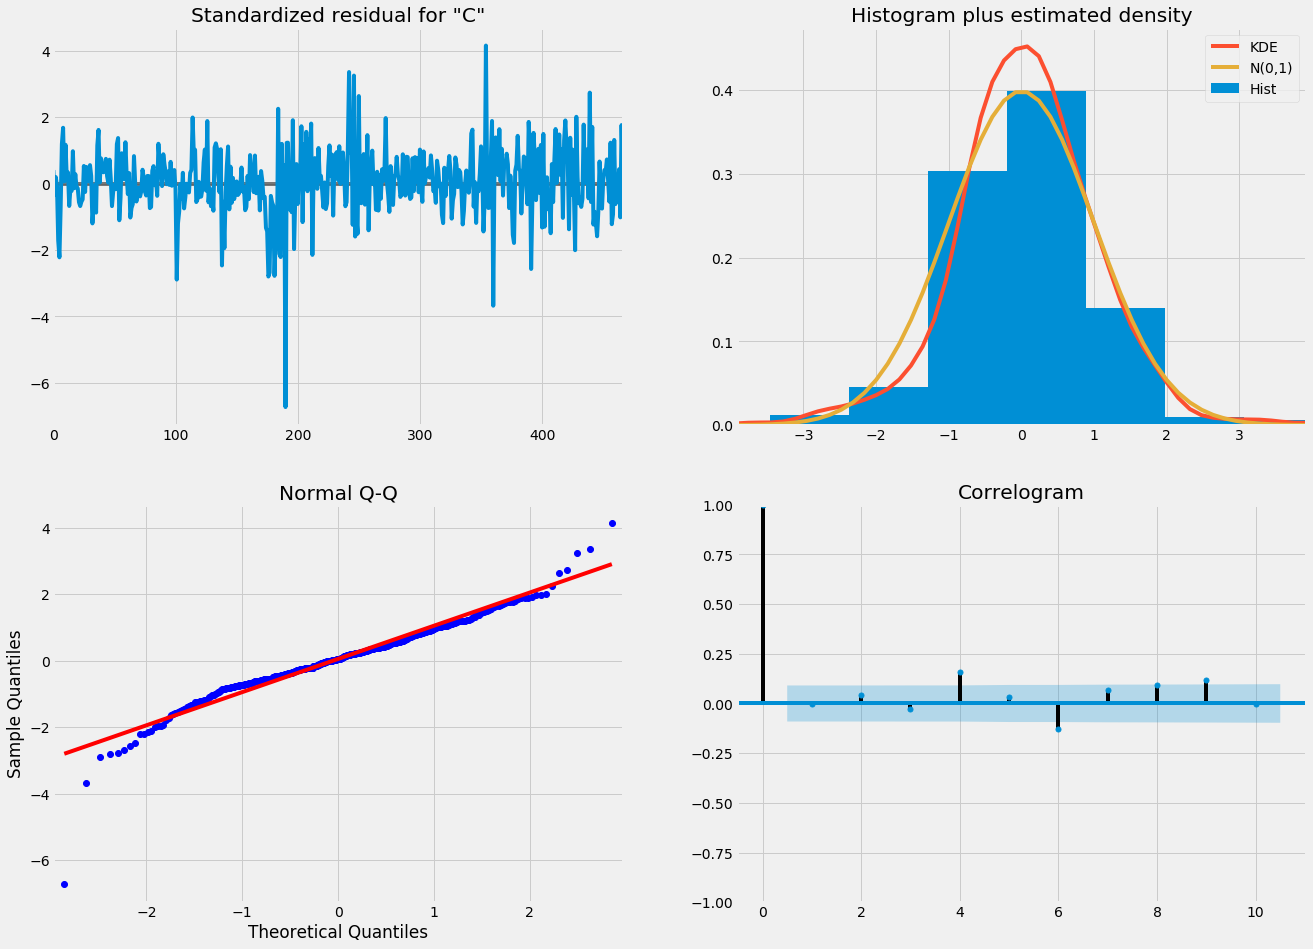

In [72]:
# Create the 4 diagostics plots
model_fit.plot_diagnostics(figsize=(20,15))
plt.show()

### One step forecasting 

In [253]:
# Generate predictions
one_step_forecast = model_fit.get_prediction(start=-1)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Close']
upper_limits = confidence_intervals.loc[:,'upper Close']

# Print best estimate predictions
print(mean_forecast)

Date
2021-04-15    7.329876
dtype: float64


### General Dynamic Prediction

In [256]:
# Generate predictions
one_step_forecast = model_fit.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Close']
upper_limits = confidence_intervals.loc[:,'upper Close']

# Print best estimate predictions
print(mean_forecast)

Date
2021-03-30    7.184237
2021-03-31    7.198683
2021-04-01    7.148288
2021-04-05    7.179674
2021-04-06    7.127680
2021-04-07    7.103391
2021-04-08    7.085676
2021-04-09    7.097836
2021-04-12    7.126168
2021-04-13    7.173345
2021-04-14    7.207399
2021-04-15    7.158945
Name: predicted_mean, dtype: float64


## LSTM

In [73]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [75]:
df_lstm = df.Close.values
#df_lstm

In [77]:
df_lstm = df_lstm.reshape(-1,1)
df_lstm 

array([[8.10999966],
       [8.15999985],
       [8.13000011],
       [8.02999973],
       [8.09000015],
       [8.07999992],
       [8.        ],
       [8.13000011],
       [8.10000038],
       [8.14999962],
       [8.13000011],
       [8.        ],
       [8.47999954],
       [8.5       ],
       [8.47999954],
       [8.48999977],
       [8.67000008],
       [8.72000027],
       [8.75      ],
       [8.77000046],
       [8.78999996],
       [8.68999958],
       [8.39000034],
       [8.35000038],
       [8.30000019],
       [8.27000046],
       [8.18999958],
       [8.13000011],
       [8.05000019],
       [7.92000008],
       [7.80000019],
       [7.88000011],
       [8.10000038],
       [8.05000019],
       [8.13000011],
       [8.06000042],
       [8.21000004],
       [8.        ],
       [8.13000011],
       [8.18999958],
       [8.14999962],
       [8.14999962],
       [8.07999992],
       [7.73999977],
       [7.36999989],
       [7.1500001 ],
       [7.32999992],
       [7.650

In [78]:
# Scaling the data
scalar =MinMaxScaler()
df_lstm=scalar.fit_transform(df_lstm)

In [79]:
# Split into train and test
train = df_lstm[:-49,:]
test = df_lstm[-49:,:]

In [80]:
print(len(train), len(test))

457 49


In [83]:
# Building the 2D array for supervised learning
def create_data(sequence, time_stemp):
    dataX = []
    dataY = []
    for i in range(len(sequence)-time_stemp-1):
        a = sequence[i:(i+time_stemp), 0]
        dataX.append(a)
        dataY.append(sequence[i + time_stemp, 0])
    return np.array(dataX),  np.array(dataY)

In [84]:
time_stemp = 1

In [86]:
# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train,time_stemp)
test_X, test_Y =create_data(test, time_stemp)

In [87]:
# transform input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [88]:
train_X.shape

(455, 1, 1)

In [90]:
train_Y.shape

(455,)

In [91]:
test_Y.shape

(47,)

In [89]:
test_X.shape

(47, 1, 1)

In [92]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
#from tensorflow.keras import model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

## Adam Optimiser

In [93]:
# Build the LSTM Model
model = tensorflow.keras.Sequential()
# Adding the input layer and LSTM layer
model.add(tensorflow.keras.layers.LSTM(50, activation= 'relu', input_shape =(1,1)))
model.add(Dropout(0.15))
model.add(Dense(1)) 
model.compile(optimizer ='adam', loss='mse')

history = model.fit(train_X, train_Y, shuffle=True, epochs=5,validation_split=0.3, verbose=1, batch_size=10)

Train on 318 samples, validate on 137 samples
Epoch 1/5
318/318 [==============================] - 6s 19ms/sample - loss: 0.4328 - val_loss: 0.1211
Epoch 2/5
318/318 [==============================] - 0s 1ms/sample - loss: 0.2996 - val_loss: 0.0624
Epoch 3/5
318/318 [==============================] - 0s 727us/sample - loss: 0.1847 - val_loss: 0.0211
Epoch 4/5
318/318 [==============================] - 0s 682us/sample - loss: 0.0925 - val_loss: 0.0047
Epoch 5/5
318/318 [==============================] - 0s 659us/sample - loss: 0.0457 - val_loss: 0.0098


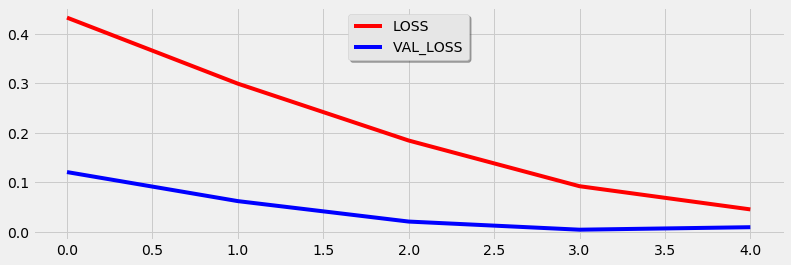

In [94]:
#plotting the graphs for loss and validation loss
fig, ax = plt.subplots(figsize=(12,4))

plt.plot(history.history['loss'], color='red', label='LOSS')
plt.plot(history.history['val_loss'], color='blue', label='VAL_LOSS')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

In [95]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_Y_pred = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_Y_pred = scalar.inverse_transform([test_Y])
# calculate root mean squared error
train_score1 = math.sqrt(mean_squared_error(train_Y_pred[0], train_predict[:,0]))
test_score1 = math.sqrt(mean_squared_error(test_Y_pred[0], test_predict[:,0]))

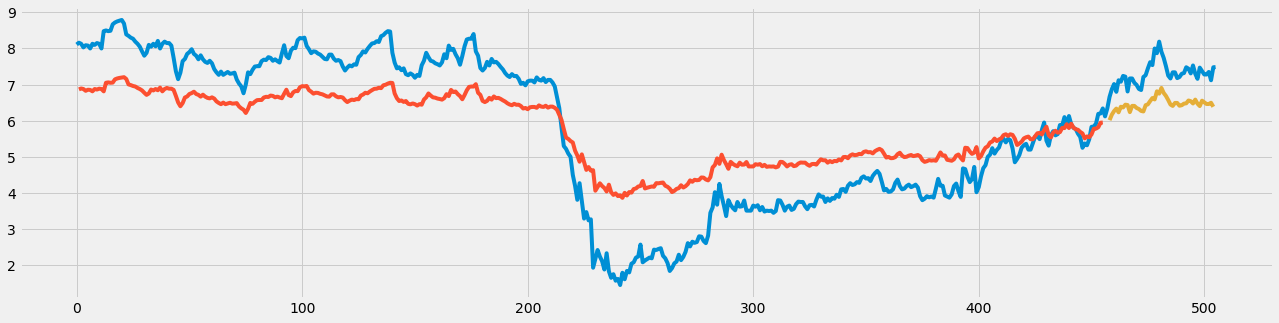

In [96]:
train_plot = np.empty_like(df_lstm) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df_lstm)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stemp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
fig = plt.figure(figsize=(20,5))
plt.plot(scalar.inverse_transform(df_lstm))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()